In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Lambda, Input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

from glob import glob

import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
#resize all the images
IMAGE_SIZE = [224,224]

train_path = 'C:\\Users\\User\\Desktop\\Datasets\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\train'
val_path = 'C:\\Users\\User\\Desktop\\Datasets\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\valid'

In [8]:
#import the inception v3 library and add preproessing layer to the front of inception
#here we will be using imagenet weights

inception = InceptionV3(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)



87910968/87910968 [==============================] - 8s 0us/step


In [9]:
#don't train existing weights because we are using a pre-trained model which is way superior and we dont want
# to change those weights

for layer in inception.layers:
    layer.trainable = False

In [10]:
folders = glob('C:\\Users\\User\\Desktop\\Datasets\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\train\\*')

In [11]:
folders

['C:\\Users\\User\\Desktop\\Datasets\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\train\\Tomato___Bacterial_spot',
 'C:\\Users\\User\\Desktop\\Datasets\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\train\\Tomato___Early_blight',
 'C:\\Users\\User\\Desktop\\Datasets\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\train\\Tomato___healthy',
 'C:\\Users\\User\\Desktop\\Datasets\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\train\\Tomato___Late_blight',
 'C:\\Users\\User\\Desktop\\Datasets\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\train\\Tomato___Leaf_Mold',
 'C:\\Users\\User\\Desktop\\Datasets\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\train\\Tomato___Septoria_leaf_spot',
 'C:\\Users\\User\\Desktop\\Datasets\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\tra

In [12]:
#adding our layer (other than resnet's included ones), we can add more than one if required, here just one layer 
#flattening so we can add the last layer/layers based on our requirement

x = Flatten()(inception.output)

In [13]:
#len(folders) is our number of output classes which we give in normal CNN

prediction = Dense(len(folders), activation='softmax')(x)

In [14]:
model = Model(inputs=inception.input, outputs=prediction)

In [16]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

 conv2d_11 (Conv2D)          (None, 25, 25, 32)           6144      ['average_pooling2d[0][0]']   
                                                                                                  
 batch_normalization_5 (Bat  (None, 25, 25, 64)           192       ['conv2d_5[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_7 (Bat  (None, 25, 25, 64)           192       ['conv2d_7[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_10 (Ba  (None, 25, 25, 96)           288       ['conv2d_10[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_17 (Activation)  (None, 25, 25, 96)           0         ['batch_normalization_17[0][0]
                                                                    ']                            
                                                                                                  
 activation_18 (Activation)  (None, 25, 25, 64)           0         ['batch_normalization_18[0][0]
                                                                    ']                            
                                                                                                  
 mixed1 (Concatenate)        (None, 25, 25, 288)          0         ['activation_12[0][0]',       
                                                                     'activation_14[0][0]',       
                                                                     'activation_17[0][0]',       
          

                                                                                                  
 conv2d_28 (Conv2D)          (None, 25, 25, 96)           55296     ['activation_27[0][0]']       
                                                                                                  
 batch_normalization_28 (Ba  (None, 25, 25, 96)           288       ['conv2d_28[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_28 (Activation)  (None, 25, 25, 96)           0         ['batch_normalization_28[0][0]
                                                                    ']                            
                                                                                                  
 conv2d_26 (Conv2D)          (None, 12, 12, 384)          995328    ['mixed2[0][0]']              
          

 conv2d_30 (Conv2D)          (None, 12, 12, 192)          147456    ['mixed3[0][0]']              
                                                                                                  
 conv2d_33 (Conv2D)          (None, 12, 12, 192)          172032    ['activation_32[0][0]']       
                                                                                                  
 conv2d_38 (Conv2D)          (None, 12, 12, 192)          172032    ['activation_37[0][0]']       
                                                                                                  
 conv2d_39 (Conv2D)          (None, 12, 12, 192)          147456    ['average_pooling2d_3[0][0]'] 
                                                                                                  
 batch_normalization_30 (Ba  (None, 12, 12, 192)          576       ['conv2d_30[0][0]']           
 tchNormalization)                                                                                
          

                                                                    ']                            
                                                                                                  
 average_pooling2d_4 (Avera  (None, 12, 12, 768)          0         ['mixed4[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_40 (Conv2D)          (None, 12, 12, 192)          147456    ['mixed4[0][0]']              
                                                                                                  
 conv2d_43 (Conv2D)          (None, 12, 12, 192)          215040    ['activation_42[0][0]']       
                                                                                                  
 conv2d_48 (Conv2D)          (None, 12, 12, 192)          215040    ['activation_47[0][0]']       
          

                                                                                                  
 activation_52 (Activation)  (None, 12, 12, 160)          0         ['batch_normalization_52[0][0]
                                                                    ']                            
                                                                                                  
 activation_57 (Activation)  (None, 12, 12, 160)          0         ['batch_normalization_57[0][0]
                                                                    ']                            
                                                                                                  
 average_pooling2d_5 (Avera  (None, 12, 12, 768)          0         ['mixed5[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_50

 batch_normalization_62 (Ba  (None, 12, 12, 192)          576       ['conv2d_62[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_67 (Ba  (None, 12, 12, 192)          576       ['conv2d_67[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_62 (Activation)  (None, 12, 12, 192)          0         ['batch_normalization_62[0][0]
                                                                    ']                            
                                                                                                  
 activation_67 (Activation)  (None, 12, 12, 192)          0         ['batch_normalization_67[0][0]
          

                                                                                                  
 conv2d_71 (Conv2D)          (None, 5, 5, 320)            552960    ['activation_70[0][0]']       
                                                                                                  
 conv2d_75 (Conv2D)          (None, 5, 5, 192)            331776    ['activation_74[0][0]']       
                                                                                                  
 batch_normalization_71 (Ba  (None, 5, 5, 320)            960       ['conv2d_71[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_75 (Ba  (None, 5, 5, 192)            576       ['conv2d_75[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_82 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_82[0][0]
                                                                    ']                            
                                                                                                  
 activation_83 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_83[0][0]
                                                                    ']                            
                                                                                                  
 batch_normalization_84 (Ba  (None, 5, 5, 192)            576       ['conv2d_84[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activatio

                                                                                                  
 activation_88 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_88[0][0]
                                                                    ']                            
                                                                                                  
 activation_91 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_91[0][0]
                                                                    ']                            
                                                                                                  
 activation_92 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_92[0][0]
                                                                    ']                            
                                                                                                  
 batch_nor

In [21]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [17]:
# Data augmentation for training data using ImageDataGenerator
# 1st input in ImageDataGenerator, rescale is very very important!

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
#make sure you provide same target size as you initialized the image size

training_set = train_datagen.flow_from_directory('C:\\Users\\User\\Desktop\\Datasets\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\train',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 18345 images belonging to 10 classes.


In [20]:
test_set = test_datagen.flow_from_directory('C:\\Users\\User\\Desktop\\Datasets\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\valid',
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4585 images belonging to 10 classes.


In [22]:
r = model.fit(training_set,
              validation_data = test_set,
              epochs = 5,
              steps_per_epoch = len(training_set),
              validation_steps = len(test_set))

Epoch 1/5


574/574 [==============================] - 1228s 2s/step - loss: 2.8061 - accuracy: 0.6835 - val_loss: 4.0635 - val_accuracy: 0.5930
Epoch 2/5
574/574 [==============================] - 1103s 2s/step - loss: 2.2167 - accuracy: 0.7817 - val_loss: 2.2179 - val_accuracy: 0.7961
Epoch 3/5
574/574 [==============================] - 1121s 2s/step - loss: 2.1369 - accuracy: 0.8135 - val_loss: 2.0650 - val_accuracy: 0.8290
Epoch 4/5
574/574 [==============================] - 1148s 2s/step - loss: 1.9047 - accuracy: 0.8427 - val_loss: 3.2631 - val_accuracy: 0.8009
Epoch 5/5
574/574 [==============================] - 1067s 2s/step - loss: 2.0011 - accuracy: 0.8490 - val_loss: 2.1003 - val_accuracy: 0.8373


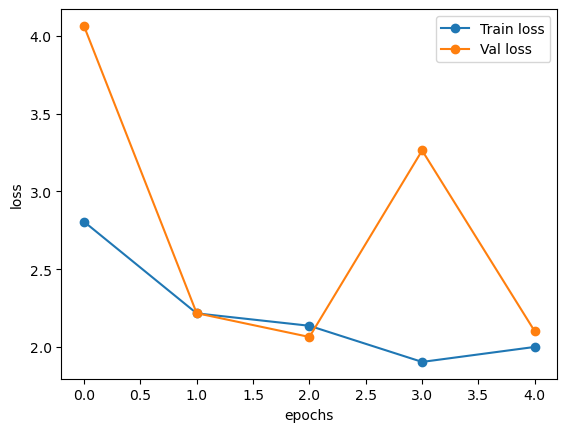

In [25]:
#plot the loss
plt.plot(r.history['loss'], label='Train loss', marker='o')
plt.plot(r.history['val_loss'], label='Val loss', marker='o')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

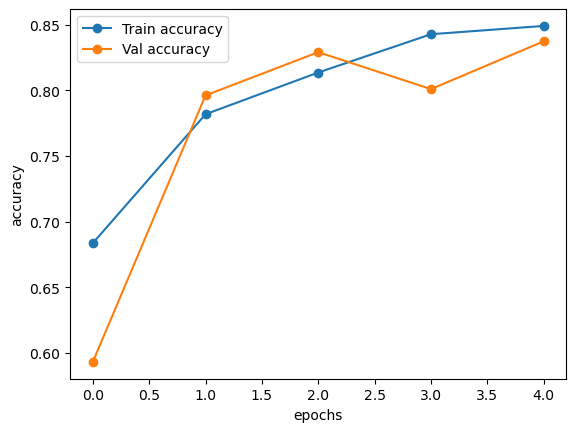

In [26]:
#plot the accuracy
plt.plot(r.history['accuracy'], label='Train accuracy', marker='o')
plt.plot(r.history['val_accuracy'], label='Val accuracy', marker='o')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [27]:
model.evaluate(test_set)

144/144 [==============================] - 201s 1s/step - loss: 2.1003 - accuracy: 0.8373


[2.1003103256225586, 0.8372955322265625]

In [46]:
test = tf.keras.preprocessing.image.load_img('C:\\Users\\User\\Desktop\\Datasets\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\valid\\Tomato___Bacterial_spot\\0c32d6d5-bf5b-4904-8108-d7a901f2cb6b___UF.GRC_BS_Lab Leaf 8662.JPG', target_size=(224,224))

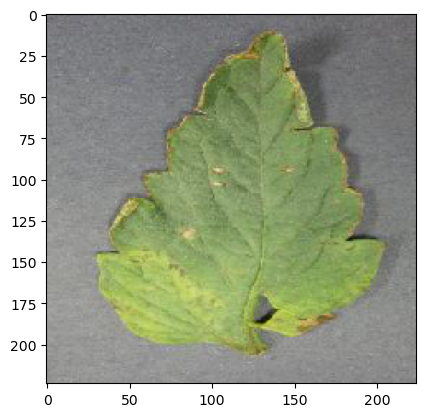

In [47]:
plt.imshow(test)

In [32]:
class_dict = training_set.class_indices
class_dict

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

In [33]:
class_name = []

for key,value in class_dict.items():
    class_name.append(key)

In [34]:
class_name

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [48]:
class_name[np.argmax(model.predict(tf.expand_dims(test, axis=0))[0])]

1/1 [==============================] - 0s 102ms/step


'Tomato___Target_Spot'